## IMPORTING THE LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)
pd.set_option('max_colwidth', 300)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn (*args, **kwargs):
    pass
warnings.warn = ignore_warn

## IMPORTING THE DATASET

In [2]:
DS = pd.read_csv('supermarket_sales - Sheet1.csv')
DS.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## EXPLORING THE DATA

In [3]:
DS.shape

(1000, 17)

In [4]:
DS.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Date                       1000 non-null object
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 132.9+ KB


In [6]:
DS.drop('Branch', axis = 1, inplace = True)
DS.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
DS['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [8]:
DS['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [9]:
DS['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [10]:
DS['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [11]:
DS.Payment.value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [12]:
DS.Date.dtype

dtype('O')

In [13]:
DS.Quantity.dtype

dtype('int64')

In [14]:
DS.Time.dtype

dtype('O')

In [15]:
DS.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## VISUALIZATION ON THE DATA

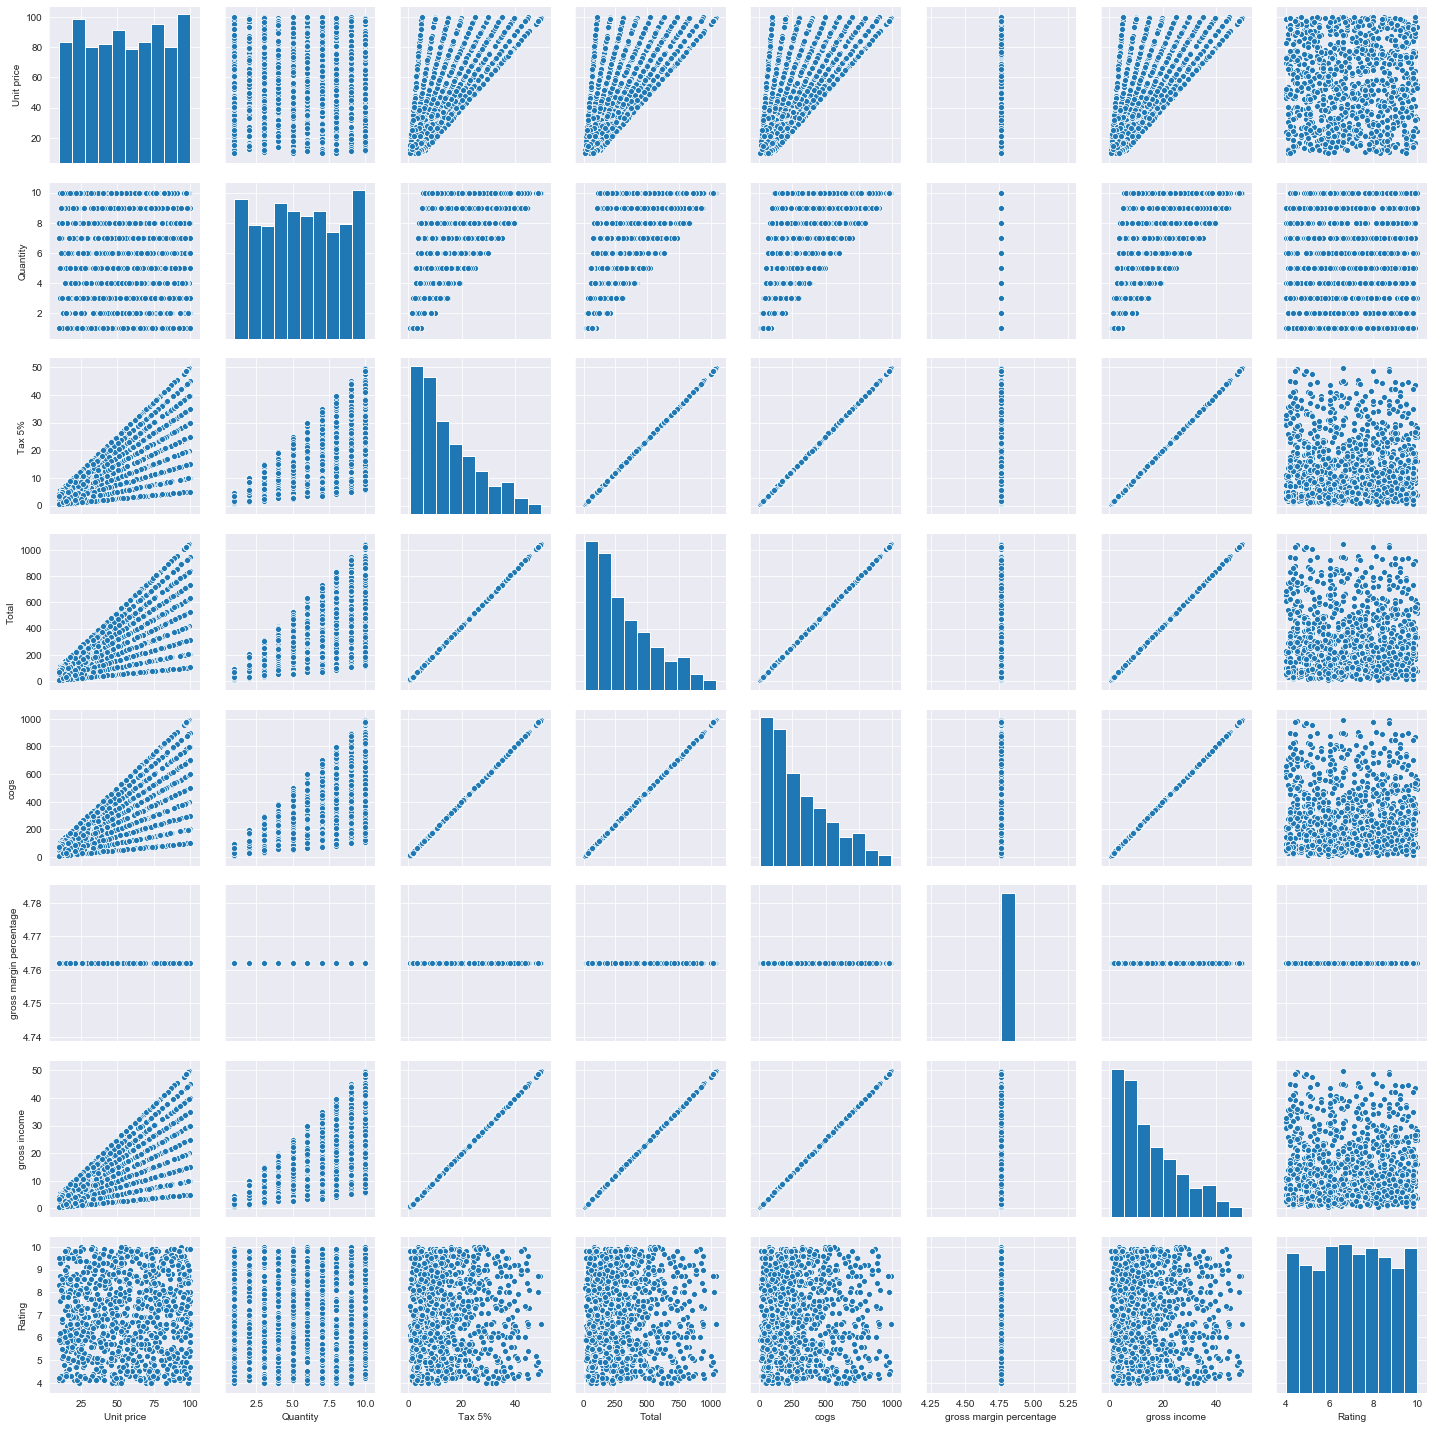

In [16]:
sns.pairplot(DS)

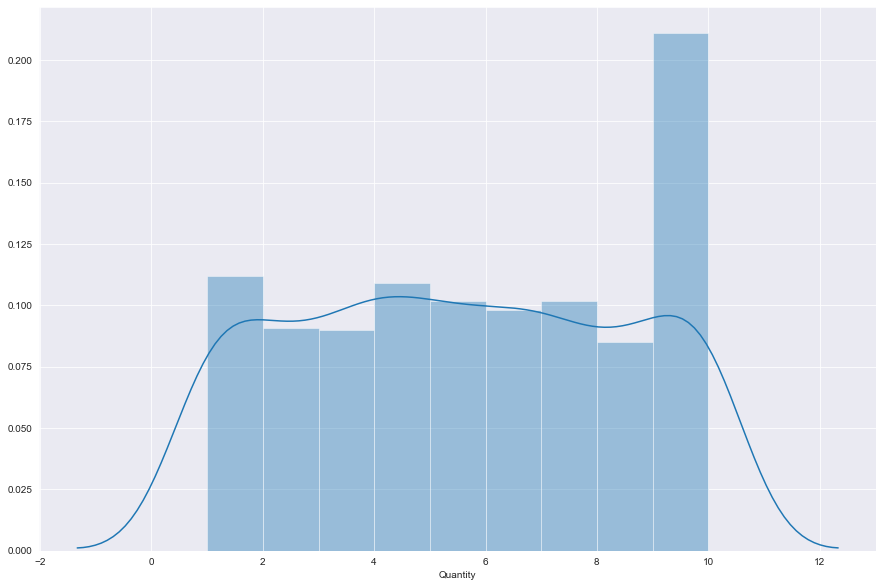

In [17]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(DS['Quantity'])

## CONVERTING THE CATEGORICAL FEATURES TO NUMERICAL PARAMETERS

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [19]:
le = LabelEncoder()
oh = OneHotEncoder()

In [20]:
y = DS.iloc[:, 6:7]
y.head()

,Quantity
0,7
1,5
2,7
3,8
4,7


In [21]:
x = DS.drop('Quantity', axis = 1)
x.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [22]:
x['Customer type'] = le.fit_transform(x['Customer type'])
x.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Yangon,0,Female,Health and beauty,74.69,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,1,Female,Electronic accessories,15.28,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,1,Male,Home and lifestyle,46.33,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Yangon,0,Male,Health and beauty,58.22,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Yangon,1,Male,Sports and travel,86.31,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [23]:
z = x[['City', 'Gender', 'Product line', 'Payment']].apply(le.fit_transform)
z.head()

,City,Gender,Product line,Payment
0,2,0,3,2
1,1,0,0,0
2,2,1,4,1
3,2,1,3,2
4,2,1,5,2


In [24]:
x.drop(['City', 'Gender', 'Product line', 'Payment'], axis = 1, inplace = True)
x.head()

,Invoice ID,Customer type,Unit price,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,74.69,26.1415,548.9715,1/5/2019,13:08,522.83,4.761905,26.1415,9.1
1,226-31-3081,1,15.28,3.8200,80.2200,3/8/2019,10:29,76.40,4.761905,3.8200,9.6
2,631-41-3108,1,46.33,16.2155,340.5255,3/3/2019,13:23,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,58.22,23.2880,489.0480,1/27/2019,20:33,465.76,4.761905,23.2880,8.4
4,373-73-7910,1,86.31,30.2085,634.3785,2/8/2019,10:37,604.17,4.761905,30.2085,5.3


In [25]:
x = pd.concat([x, z], axis = 1)
x.head()

,Invoice ID,Customer type,Unit price,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,City,Gender,Product line,Payment
0,750-67-8428,0,74.69,26.1415,548.9715,1/5/2019,13:08,522.83,4.761905,26.1415,9.1,2,0,3,2
1,226-31-3081,1,15.28,3.8200,80.2200,3/8/2019,10:29,76.40,4.761905,3.8200,9.6,1,0,0,0
2,631-41-3108,1,46.33,16.2155,340.5255,3/3/2019,13:23,324.31,4.761905,16.2155,7.4,2,1,4,1
3,123-19-1176,0,58.22,23.2880,489.0480,1/27/2019,20:33,465.76,4.761905,23.2880,8.4,2,1,3,2
4,373-73-7910,1,86.31,30.2085,634.3785,2/8/2019,10:37,604.17,4.761905,30.2085,5.3,2,1,5,2


In [26]:
x['Date'] = x['Date'].str[0]
x.head()

,Invoice ID,Customer type,Unit price,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,City,Gender,Product line,Payment
0,750-67-8428,0,74.69,26.1415,548.9715,1,13:08,522.83,4.761905,26.1415,9.1,2,0,3,2
1,226-31-3081,1,15.28,3.8200,80.2200,3,10:29,76.40,4.761905,3.8200,9.6,1,0,0,0
2,631-41-3108,1,46.33,16.2155,340.5255,3,13:23,324.31,4.761905,16.2155,7.4,2,1,4,1
3,123-19-1176,0,58.22,23.2880,489.0480,1,20:33,465.76,4.761905,23.2880,8.4,2,1,3,2
4,373-73-7910,1,86.31,30.2085,634.3785,2,10:37,604.17,4.761905,30.2085,5.3,2,1,5,2


In [27]:
x.drop('Time', axis = 1, inplace = True)
x.head()

,Invoice ID,Customer type,Unit price,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating,City,Gender,Product line,Payment
0,750-67-8428,0,74.69,26.1415,548.9715,1,522.83,4.761905,26.1415,9.1,2,0,3,2
1,226-31-3081,1,15.28,3.8200,80.2200,3,76.40,4.761905,3.8200,9.6,1,0,0,0
2,631-41-3108,1,46.33,16.2155,340.5255,3,324.31,4.761905,16.2155,7.4,2,1,4,1
3,123-19-1176,0,58.22,23.2880,489.0480,1,465.76,4.761905,23.2880,8.4,2,1,3,2
4,373-73-7910,1,86.31,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3,2,1,5,2


In [28]:
ID = x.iloc[:, 0:1]
ID.head()

,Invoice ID
0,750-67-8428
1,226-31-3081
2,631-41-3108
3,123-19-1176
4,373-73-7910


In [29]:
x.drop('Invoice ID', axis = 1, inplace = True)
x.head()

,Customer type,Unit price,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating,City,Gender,Product line,Payment
0,0,74.69,26.1415,548.9715,1,522.83,4.761905,26.1415,9.1,2,0,3,2
1,1,15.28,3.8200,80.2200,3,76.40,4.761905,3.8200,9.6,1,0,0,0
2,1,46.33,16.2155,340.5255,3,324.31,4.761905,16.2155,7.4,2,1,4,1
3,0,58.22,23.2880,489.0480,1,465.76,4.761905,23.2880,8.4,2,1,3,2
4,1,86.31,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3,2,1,5,2


In [30]:
ohe = OneHotEncoder(categorical_features = [[0,4,9,10,11,12]])
x = ohe.fit_transform(x).toarray()
x

array([[ 1.        ,  0.        ,  1.        , ...,  4.76190476,
        26.1415    ,  9.1       ],
       [ 0.        ,  1.        ,  0.        , ...,  4.76190476,
         3.82      ,  9.6       ],
       [ 0.        ,  1.        ,  0.        , ...,  4.76190476,
        16.2155    ,  7.4       ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  4.76190476,
         1.592     ,  7.7       ],
       [ 0.        ,  1.        ,  0.        , ...,  4.76190476,
         3.291     ,  4.1       ],
       [ 1.        ,  0.        ,  0.        , ...,  4.76190476,
        30.919     ,  6.6       ]])

In [31]:
DS.columns

Index(['Invoice ID', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [32]:
col = ['Member', 'Normal', 'January', 'February', 'March', 'Mandalay', 'NayPyiTaw', 'Yangon', 'Female', 'Male', 'Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel', 'Cash', 'Credit card', 'Ewallet', 'Unit price', 'Tax 5%', 'Total',
       'cogs', 'gross margin percentage', 'gross income', 'Rating']

In [33]:
x = pd.DataFrame(x, columns = col)
x

,Member,Normal,January,February,March,Mandalay,NayPyiTaw,Yangon,Female,Male,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Cash,Credit card,Ewallet,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,74.69,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.28,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,46.33,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,58.22,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,86.31,30.2085,634.3785,604.17,4.761905,30.2085,5.3
5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.39,29.8865,627.6165,597.73,4.761905,29.8865,4.1
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,68.84,20.6520,433.6920,413.04,4.761905,20.6520,5.8
7,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.56,36.7800,772.3800,735.60,4.761905,36.7800,8.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,36.26,3.6260,76.1460,72.52,4.761905,3.6260,7.2
9,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54.84,8.2260,172.7460,164.52,4.761905,8.2260,5.9


In [34]:
DS.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [35]:
x.head()

,Member,Normal,January,February,March,Mandalay,NayPyiTaw,Yangon,Female,Male,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Cash,Credit card,Ewallet,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,74.69,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.28,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,46.33,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,58.22,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,86.31,30.2085,634.3785,604.17,4.761905,30.2085,5.3


In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
Member                     1000 non-null float64
Normal                     1000 non-null float64
January                    1000 non-null float64
February                   1000 non-null float64
March                      1000 non-null float64
Mandalay                   1000 non-null float64
NayPyiTaw                  1000 non-null float64
Yangon                     1000 non-null float64
Female                     1000 non-null float64
Male                       1000 non-null float64
Electronic accessories     1000 non-null float64
Fashion accessories        1000 non-null float64
Food and beverages         1000 non-null float64
Health and beauty          1000 non-null float64
Home and lifestyle         1000 non-null float64
Sports and travel          1000 non-null float64
Cash                       1000 non-null float64
Credit card                1000 non-null float64
Ewallet     

In [37]:
y.head()

,Quantity
0,7
1,5
2,7
3,8
4,7


In [38]:
x.isna().sum()

Member                     0
Normal                     0
January                    0
February                   0
March                      0
Mandalay                   0
NayPyiTaw                  0
Yangon                     0
Female                     0
Male                       0
Electronic accessories     0
Fashion accessories        0
Food and beverages         0
Health and beauty          0
Home and lifestyle         0
Sports and travel          0
Cash                       0
Credit card                0
Ewallet                    0
Unit price                 0
Tax 5%                     0
Total                      0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [39]:
y.isna().sum()

Quantity    0
dtype: int64

## TRAINING AND SPLITTING THE DATASET

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtr, xts, ytr, yts = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [42]:
xtr

,Member,Normal,January,February,March,Mandalay,NayPyiTaw,Yangon,Female,Male,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Cash,Credit card,Ewallet,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
29,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,24.89,11.2005,235.2105,224.01,4.761905,11.2005,7.4
535,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16.67,5.8345,122.5245,116.69,4.761905,5.8345,7.4
695,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,87.37,21.8425,458.6925,436.85,4.761905,21.8425,6.6
557,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,98.52,49.2600,1034.4600,985.20,4.761905,49.2600,4.5
836,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.54,9.6350,202.3350,192.70,4.761905,9.6350,5.6
596,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,52.20,7.8300,164.4300,156.60,4.761905,7.8300,9.5
165,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,42.57,17.0280,357.5880,340.56,4.761905,17.0280,5.6
918,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,68.97,10.3455,217.2555,206.91,4.761905,10.3455,8.7
495,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,75.92,30.3680,637.7280,607.36,4.761905,30.3680,5.5
824,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60.08,21.0280,441.5880,420.56,4.761905,21.0280,4.5


In [43]:
xts

,Member,Normal,January,February,March,Mandalay,NayPyiTaw,Yangon,Female,Male,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Cash,Credit card,Ewallet,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
521,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,83.17,24.9510,523.9710,499.02,4.761905,24.9510,7.3
737,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.76,29.3800,616.9800,587.60,4.761905,29.3800,9.0
740,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,55.61,19.4635,408.7335,389.27,4.761905,19.4635,8.5
660,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,42.97,6.4455,135.3555,128.91,4.761905,6.4455,9.3
411,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,21.87,2.1870,45.9270,43.74,4.761905,2.1870,6.9
678,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,58.95,29.4750,618.9750,589.50,4.761905,29.4750,8.1
626,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,60.87,6.0870,127.8270,121.74,4.761905,6.0870,8.7
513,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,99.55,34.8425,731.6925,696.85,4.761905,34.8425,7.6
859,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,47.63,21.4335,450.1035,428.67,4.761905,21.4335,5.0
136,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.31,6.5775,138.1275,131.55,4.761905,6.5775,8.8


In [44]:
xtr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 29 to 102
Data columns (total 26 columns):
Member                     800 non-null float64
Normal                     800 non-null float64
January                    800 non-null float64
February                   800 non-null float64
March                      800 non-null float64
Mandalay                   800 non-null float64
NayPyiTaw                  800 non-null float64
Yangon                     800 non-null float64
Female                     800 non-null float64
Male                       800 non-null float64
Electronic accessories     800 non-null float64
Fashion accessories        800 non-null float64
Food and beverages         800 non-null float64
Health and beauty          800 non-null float64
Home and lifestyle         800 non-null float64
Sports and travel          800 non-null float64
Cash                       800 non-null float64
Credit card                800 non-null float64
Ewallet                    800

In [45]:
xts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 521 to 78
Data columns (total 26 columns):
Member                     200 non-null float64
Normal                     200 non-null float64
January                    200 non-null float64
February                   200 non-null float64
March                      200 non-null float64
Mandalay                   200 non-null float64
NayPyiTaw                  200 non-null float64
Yangon                     200 non-null float64
Female                     200 non-null float64
Male                       200 non-null float64
Electronic accessories     200 non-null float64
Fashion accessories        200 non-null float64
Food and beverages         200 non-null float64
Health and beauty          200 non-null float64
Home and lifestyle         200 non-null float64
Sports and travel          200 non-null float64
Cash                       200 non-null float64
Credit card                200 non-null float64
Ewallet                    200

In [46]:
ytr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 29 to 102
Data columns (total 1 columns):
Quantity    800 non-null int64
dtypes: int64(1)
memory usage: 12.5 KB


In [47]:
yts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 521 to 78
Data columns (total 1 columns):
Quantity    200 non-null int64
dtypes: int64(1)
memory usage: 3.1 KB


In [48]:
yts

,Quantity
521,6
737,10
740,7
660,3
411,2
678,10
626,2
513,7
859,9
136,5


## APPLICATION OF THE REGRESSION MODELS

## LINEAR REGRESSION MODEL

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(xtr, ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
x.columns

Index(['Member', 'Normal', 'January', 'February', 'March', 'Mandalay',
       'NayPyiTaw', 'Yangon', 'Female', 'Male', 'Electronic accessories',
       'Fashion accessories', 'Food and beverages', 'Health and beauty',
       'Home and lifestyle', 'Sports and travel', 'Cash', 'Credit card',
       'Ewallet', 'Unit price', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [53]:
predictors = x[['Unit price', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating']]
predictors.head()

,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,30.2085,634.3785,604.17,4.761905,30.2085,5.3


In [54]:
coef = lr.coef_
coef = pd.DataFrame(coef)
coef

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.020088,-0.019167,-4.742029e+08,-4.742029e+08,-4.742029e+08,1.817492e+09,1.817492e+09,1.817492e+09,-996671.187584,-996671.211299,-1.029450e+08,-1.029450e+08,-1.029450e+08,-1.029450e+08,-1.029450e+08,-1.029450e+08,-6.471303e+08,-6.471303e+08,-6.471303e+08,-0.081216,-2.432660e+08,-9.112848e+10,9.575372e+10,1.997329e+10,-1.133071e+09,0.03288


In [55]:
coeff_df = pd.DataFrame(lr.coef_, index = ['Coefficient'], columns = x.columns)  
coeff_df

,Member,Normal,January,February,March,Mandalay,NayPyiTaw,Yangon,Female,Male,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Cash,Credit card,Ewallet,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Coefficient,0.020088,-0.019167,-4.742029e+08,-4.742029e+08,-4.742029e+08,1.817492e+09,1.817492e+09,1.817492e+09,-996671.187584,-996671.211299,-1.029450e+08,-1.029450e+08,-1.029450e+08,-1.029450e+08,-1.029450e+08,-1.029450e+08,-6.471303e+08,-6.471303e+08,-6.471303e+08,-0.081216,-2.432660e+08,-9.112848e+10,9.575372e+10,1.997329e+10,-1.133071e+09,0.03288


In [56]:
coefficients = coeff_df.values.reshape(-1, 1)
coefficients = pd.DataFrame(coefficients, x.columns, columns = ['Coefficient'])
coefficients

,Coefficient
Member,2.008793e-02
Normal,-1.916681e-02
January,-4.742029e+08
February,-4.742029e+08
March,-4.742029e+08
Mandalay,1.817492e+09
NayPyiTaw,1.817492e+09
Yangon,1.817492e+09
Female,-9.966712e+05
Male,-9.966712e+05


In [57]:
yp = lr.predict(xts)

In [58]:
yp = pd.DataFrame(yp, columns=['Predicted'])
yp

,Predicted
0,5.991913
1,9.452850
2,6.593475
3,4.193085
4,4.531464
5,9.570038
6,2.435272
7,7.648163
8,7.843475
9,5.275116


In [59]:
yts

,Quantity
521,6
737,10
740,7
660,3
411,2
678,10
626,2
513,7
859,9
136,5


In [60]:
yts.columns

Index(['Quantity'], dtype='object')

In [61]:
predictors.iterrows()

<generator object DataFrame.iterrows at 0x000002627DCC32A0>

In [62]:
predictors.head()

,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,30.2085,634.3785,604.17,4.761905,30.2085,5.3


In [63]:
n = yts
n.head()

,Quantity
521,6
737,10
740,7
660,3
411,2


In [64]:
n.reset_index(inplace = True)

In [65]:
n.head()

,index,Quantity
0,521,6
1,737,10
2,740,7
3,660,3
4,411,2


In [66]:
m = n['index']
m = np.array(m)
m

array([521, 737, 740, 660, 411, 678, 626, 513, 859, 136, 811,  76, 636,
       973, 938, 899, 280, 883, 761, 319, 549, 174, 371, 527, 210, 235,
       101, 986, 902, 947, 346, 139, 621, 499, 370, 198, 687, 584, 901,
        59, 328,  96, 312, 974, 299, 277, 924, 601, 439, 837, 570, 879,
       261, 578,  23,  30, 617,  10, 221, 820, 296,  54, 542, 209, 604,
       692, 662, 866,  70, 543, 107, 493, 590, 741, 292, 289, 652,  39,
       589, 307, 679,  66, 275,  67, 318, 548, 998, 714, 753, 327, 382,
       451, 522, 218, 787, 436, 764,  88,  63, 826, 716, 351, 936, 256,
       635, 644, 554, 959, 168, 917, 528, 823, 985, 816,  86, 432, 184,
       978, 534, 294, 892, 425, 713, 260, 237, 559, 583, 445, 867, 800,
       599, 849, 265, 995, 529,  55, 120, 215,  25,  72,  44, 247, 721,
       281, 893, 914, 810, 244, 822, 321, 643, 158, 977, 429, 941, 462,
       309, 697,  60, 884, 595, 767, 649, 650, 865, 668, 298, 689, 314,
       310, 361, 479, 110, 989, 486, 363, 254, 259, 802, 677, 49

In [67]:
yts.head()

,index,Quantity
0,521,6
1,737,10
2,740,7
3,660,3
4,411,2


In [68]:
yp.head()

,Predicted
0,5.991913
1,9.452850
2,6.593475
3,4.193085
4,4.531464


In [69]:
yts.set_index('index', inplace = True)
yts.head()

,Quantity
index,
521,6
737,10
740,7
660,3
411,2


In [70]:
from sklearn import metrics

In [71]:
from sklearn.metrics import r2_score

## MULTIPLE LINEAR REGRESSION PERFORMANCE

In [72]:
LRscore = r2_score(yts, yp)
LRscore

0.8210925120984416

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yts, yp))  
print('Mean Squared Error:', metrics.mean_squared_error(yts, yp))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yts, yp)))

Mean Absolute Error: 0.8437457275390625
Mean Squared Error: 1.3951161179691554
Root Mean Squared Error: 1.1811503367349794


## DATA PREPROCESSING 
## SCALING OF THE NUMERICAL PARAMETERS

C:\Users\Emman Bryte\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Emman Bryte\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


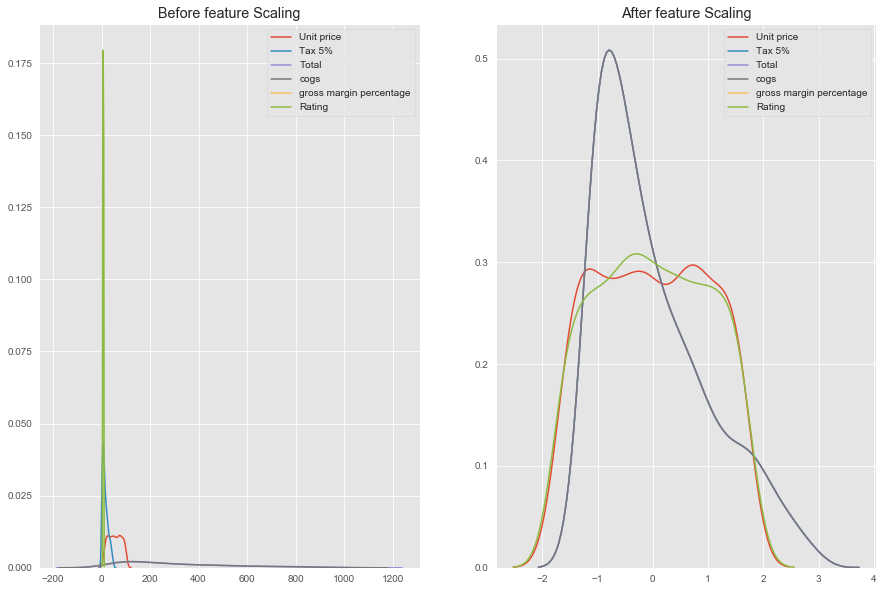

In [74]:
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')

scaler = preprocessing.StandardScaler()
scaled_x = scaler.fit_transform(x)
scaled_x = pd.DataFrame(scaled_x, columns = col)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 10))
ax1.set_title('Before feature Scaling')
sns.kdeplot(x['Unit price'], ax=ax1)
sns.kdeplot(x['Tax 5%'], ax=ax1)
sns.kdeplot(x['Total'], ax=ax1)
sns.kdeplot(x['cogs'], ax=ax1)
sns.kdeplot(x['gross margin percentage'], ax=ax1)
sns.kdeplot(x['Rating'], ax=ax1)
ax2.set_title('After feature Scaling')
sns.kdeplot(scaled_x['Unit price'], ax=ax2)
sns.kdeplot(scaled_x['Tax 5%'], ax=ax2)
sns.kdeplot(scaled_x['Total'], ax=ax2)
sns.kdeplot(scaled_x['cogs'], ax=ax2)
sns.kdeplot(scaled_x['gross margin percentage'], ax=ax2)
sns.kdeplot(scaled_x['Rating'], ax=ax2)
plt.show()

C:\Users\Emman Bryte\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Emman Bryte\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


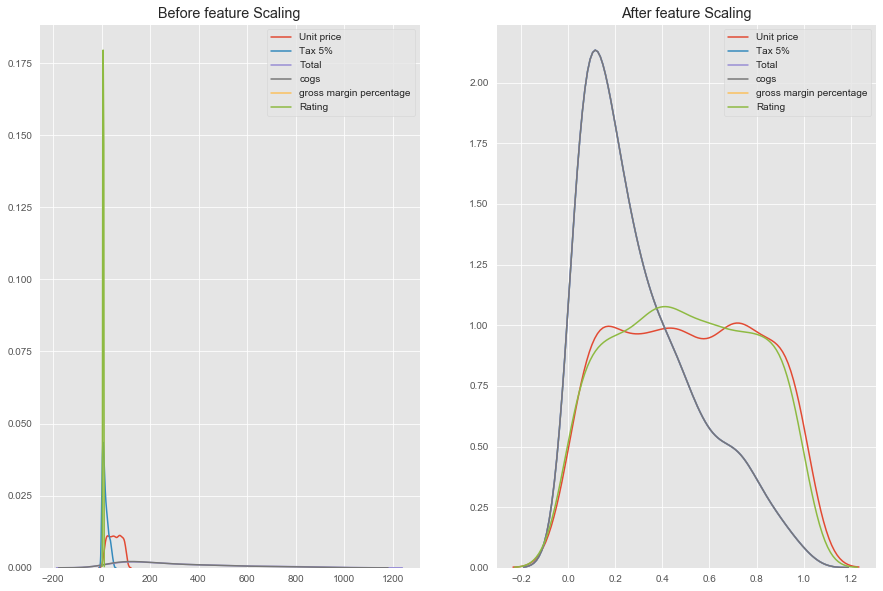

In [75]:
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')

scaler = preprocessing.MinMaxScaler()
scaled_x = scaler.fit_transform(x)
scaled_x = pd.DataFrame(scaled_x, columns = col)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 10))
ax1.set_title('Before feature Scaling')
sns.kdeplot(x['Unit price'], ax=ax1)
sns.kdeplot(x['Tax 5%'], ax=ax1)
sns.kdeplot(x['Total'], ax=ax1)
sns.kdeplot(x['cogs'], ax=ax1)
sns.kdeplot(x['gross margin percentage'], ax=ax1)
sns.kdeplot(x['Rating'], ax=ax1)
ax2.set_title('After feature Scaling')
sns.kdeplot(scaled_x['Unit price'], ax=ax2)
sns.kdeplot(scaled_x['Tax 5%'], ax=ax2)
sns.kdeplot(scaled_x['Total'], ax=ax2)
sns.kdeplot(scaled_x['cogs'], ax=ax2)
sns.kdeplot(scaled_x['gross margin percentage'], ax=ax2)
sns.kdeplot(scaled_x['Rating'], ax=ax2)
plt.show()

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
xs = StandardScaler()

In [78]:
x_tr = xs.fit_transform(xtr)
x_ts = xs.fit_transform(xts)

## DECISION TREE REGRESSOR MODEL

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
dt = DecisionTreeRegressor()

In [81]:
dt.fit(x_tr, ytr)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [82]:
y_p = dt.predict(x_ts)

In [83]:
y_p

array([ 5., 10.,  7.,  3.,  2., 10.,  2.,  7.,  9.,  5., 10.,  8.,  8.,
        4.,  3.,  9.,  8.,  7., 10.,  4.,  6.,  7.,  2.,  2.,  9.,  2.,
        9.,  1.,  5.,  1.,  1.,  8.,  1.,  8.,  7.,  4., 10.,  3.,  3.,
        5.,  4., 10.,  4.,  2.,  1.,  4.,  6.,  1.,  7.,  6.,  4.,  5.,
        3.,  4.,  5.,  5.,  5.,  4.,  7.,  4.,  4.,  1.,  4.,  9.,  7.,
        9.,  6.,  8., 10.,  5.,  6.,  9.,  6.,  1.,  1.,  7., 10.,  8.,
        5.,  7.,  5.,  3.,  6.,  6.,  8.,  5.,  1.,  8.,  5.,  4.,  5.,
        7.,  5.,  8.,  5.,  3.,  4.,  1., 10.,  9.,  7.,  7.,  7.,  1.,
        9.,  5.,  7.,  9.,  6.,  4., 10.,  4.,  5.,  8.,  5.,  6.,  5.,
        1.,  5.,  8.,  5.,  8., 10.,  8.,  6.,  3.,  4.,  1.,  2.,  7.,
        2.,  6.,  7.,  1.,  9.,  7.,  8.,  1.,  8.,  3.,  2.,  4.,  8.,
        1.,  5.,  3.,  7.,  8.,  2.,  1.,  8.,  9.,  6., 10.,  9.,  4.,
        2.,  3.,  3.,  2.,  3.,  6., 10.,  5.,  2.,  6.,  4.,  4., 10.,
        6.,  8.,  1.,  1.,  8., 10.,  6.,  7.,  4.,  7.,  4.,  2

In [84]:
y_p = pd.DataFrame(y_p, columns=['Predicted'])
y_p.head()

,Predicted
0,5.0
1,10.0
2,7.0
3,3.0
4,2.0


In [85]:
len(y_p)

200

In [86]:
DTRscore = r2_score(yts, y_p)

## DECISION TREE REGRESSOR PERFORMANCE

In [87]:
DTRscore

0.9570401290078514

In [88]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yts, y_p))  
print('Mean Squared Error:', metrics.mean_squared_error(yts, y_p))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yts, y_p)))

Mean Absolute Error: 0.275
Mean Squared Error: 0.335
Root Mean Squared Error: 0.5787918451395113


## SUPPORT VECTOR REGRESSOR MODEL

In [89]:
from sklearn.svm import SVR

In [90]:
sv = SVR(kernel = 'rbf')

In [91]:
sv.fit(x_tr, ytr)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
ypred = sv.predict(x_ts)
ypred

array([6.14315483, 8.58059622, 6.9273671 , 4.17363187, 3.51163377,
       8.77953611, 2.56770583, 7.39243322, 7.8461759 , 4.43473634,
       7.63763945, 8.15880222, 5.54660992, 3.04321001, 3.16626906,
       7.3814943 , 7.60847197, 5.89393891, 8.51977413, 4.45420244,
       6.01704226, 5.60231844, 2.68913633, 2.52404886, 6.39317569,
       2.58734802, 9.02637328, 4.31837065, 4.9086391 , 2.29893292,
       1.26980727, 7.60521996, 1.79182738, 6.95703247, 5.75172232,
       4.45150207, 8.791527  , 3.42799915, 4.41578709, 5.79628385,
       4.34755327, 8.74457427, 4.42891069, 2.27167288, 1.32415427,
       4.35534196, 5.77801282, 2.3212049 , 7.15256391, 5.3998056 ,
       5.49576408, 5.19178463, 3.90911773, 4.1880302 , 4.85975183,
       5.62853648, 5.22513803, 4.72973688, 6.73002301, 4.05444246,
       4.66653804, 3.40998944, 4.39699125, 8.35328897, 6.81014946,
       8.31433901, 6.07095725, 8.05915329, 8.67328192, 4.90155539,
       6.11085853, 5.96152726, 5.59092602, 1.90321825, 2.11369

In [93]:
ypred = pd.DataFrame(ypred, columns = ['Predicted'])
ypred.head()

,Predicted
0,6.143155
1,8.580596
2,6.927367
3,4.173632
4,3.511634


In [94]:
len(ypred)

200

## SVR PERFORMANCE

In [95]:
SVRscore = r2_score(yts, ypred)
SVRscore

0.8241933826874468

In [96]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yts, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(yts, ypred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yts, ypred)))

Mean Absolute Error: 0.8312690249226634
Mean Squared Error: 1.3709356066378566
Root Mean Squared Error: 1.1708695942067402


## RANDOM FOREST REGRESSOR MODEL

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
rf = RandomForestRegressor()

In [99]:
rf.fit(x_tr, ytr)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [100]:
y_pred = rf.predict(x_ts)
y_pred = pd.DataFrame(y_pred, columns = ['Predicted'])
y_pred.head()

,Predicted
0,5.9
1,9.5
2,6.8
3,3.1
4,2.0


## RANDOM FOREST REGRESSOR PERFORMANCE

In [101]:
RFscore = r2_score(yts, y_pred)
RFscore

0.9807129415008383

In [102]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yts, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yts, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yts, y_pred)))

Mean Absolute Error: 0.23099999999999998
Mean Squared Error: 0.15039999999999998
Root Mean Squared Error: 0.3878143885933063


In [103]:
yts.head()

,Quantity
index,
521,6
737,10
740,7
660,3
411,2


In [104]:
yts.reset_index(inplace = True)
yts.head()

,index,Quantity
0,521,6
1,737,10
2,740,7
3,660,3
4,411,2


## DEVIATION ANALYSIS

In [105]:
Comparison_of_LinearRegression_prediction = pd.concat([yts, yp], axis = 1)
Comparison_of_LinearRegression_prediction

,index,Quantity,Predicted
0,521,6,5.991913
1,737,10,9.452850
2,740,7,6.593475
3,660,3,4.193085
4,411,2,4.531464
5,678,10,9.570038
6,626,2,2.435272
7,513,7,7.648163
8,859,9,7.843475
9,136,5,5.275116


In [106]:
Comparison_of_DTR_prediction = pd.concat([yts, y_p], axis = 1)
Comparison_of_DTR_prediction

,index,Quantity,Predicted
0,521,6,5.0
1,737,10,10.0
2,740,7,7.0
3,660,3,3.0
4,411,2,2.0
5,678,10,10.0
6,626,2,2.0
7,513,7,7.0
8,859,9,9.0
9,136,5,5.0


In [107]:
Comparison_of_SVR_prediction = pd.concat([yts, ypred], axis = 1)
Comparison_of_SVR_prediction

,index,Quantity,Predicted
0,521,6,6.143155
1,737,10,8.580596
2,740,7,6.927367
3,660,3,4.173632
4,411,2,3.511634
5,678,10,8.779536
6,626,2,2.567706
7,513,7,7.392433
8,859,9,7.846176
9,136,5,4.434736


In [108]:
Comparison_of_RFR_prediction = pd.concat([yts, y_pred], axis = 1)
Comparison_of_RFR_prediction

,index,Quantity,Predicted
0,521,6,5.9
1,737,10,9.5
2,740,7,6.8
3,660,3,3.1
4,411,2,2.0
5,678,10,9.4
6,626,2,2.0
7,513,7,7.0
8,859,9,8.6
9,136,5,4.7


In [109]:
Comparison_of_LinearRegression_prediction.drop('index', axis = 1, inplace = True)

In [110]:
A = Comparison_of_LinearRegression_prediction
A = A.head(25)
A

,Quantity,Predicted
0,6,5.991913
1,10,9.452850
2,7,6.593475
3,3,4.193085
4,2,4.531464
5,10,9.570038
6,2,2.435272
7,7,7.648163
8,9,7.843475
9,5,5.275116


In [111]:
Comparison_of_DTR_prediction.drop('index', axis = 1, inplace = True)

In [112]:
B = Comparison_of_DTR_prediction
B = B.head(25)
B

,Quantity,Predicted
0,6,5.0
1,10,10.0
2,7,7.0
3,3,3.0
4,2,2.0
5,10,10.0
6,2,2.0
7,7,7.0
8,9,9.0
9,5,5.0


In [113]:
Comparison_of_SVR_prediction.drop('index', axis = 1, inplace = True)

In [114]:
C = Comparison_of_SVR_prediction
C = C.head(25)
C

,Quantity,Predicted
0,6,6.143155
1,10,8.580596
2,7,6.927367
3,3,4.173632
4,2,3.511634
5,10,8.779536
6,2,2.567706
7,7,7.392433
8,9,7.846176
9,5,4.434736


In [115]:
Comparison_of_RFR_prediction.drop('index', axis = 1, inplace = True)

In [116]:
Comparison_of_RFR_prediction

,Quantity,Predicted
0,6,5.9
1,10,9.5
2,7,6.8
3,3,3.1
4,2,2.0
5,10,9.4
6,2,2.0
7,7,7.0
8,9,8.6
9,5,4.7


In [117]:
D = Comparison_of_RFR_prediction
D = D.head(25)
D

,Quantity,Predicted
0,6,5.9
1,10,9.5
2,7,6.8
3,3,3.1
4,2,2.0
5,10,9.4
6,2,2.0
7,7,7.0
8,9,8.6
9,5,4.7


## DEVIATION ANALYSIS VISUALIZATION

## LINEAR REGRESSION

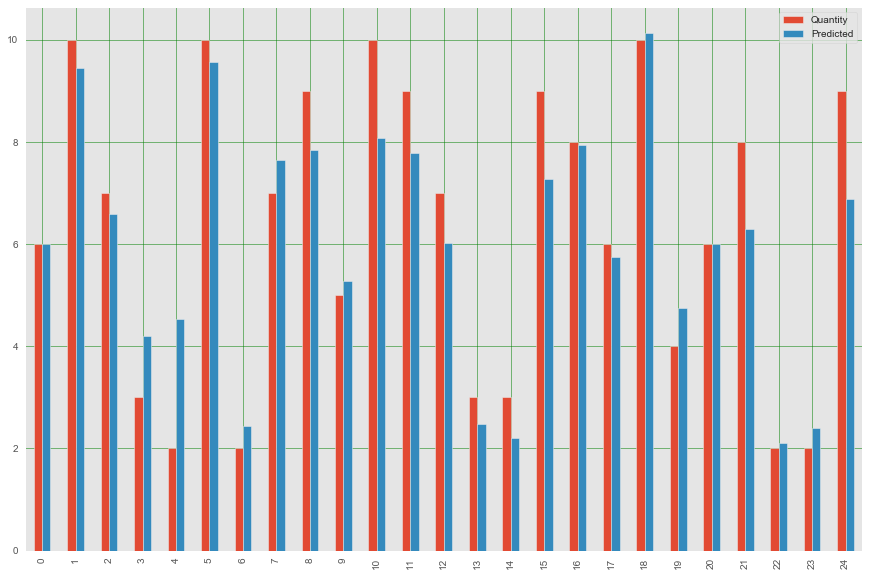

In [118]:
A.plot(kind='bar', figsize = (15, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## DECISION TREE REGRESSOR

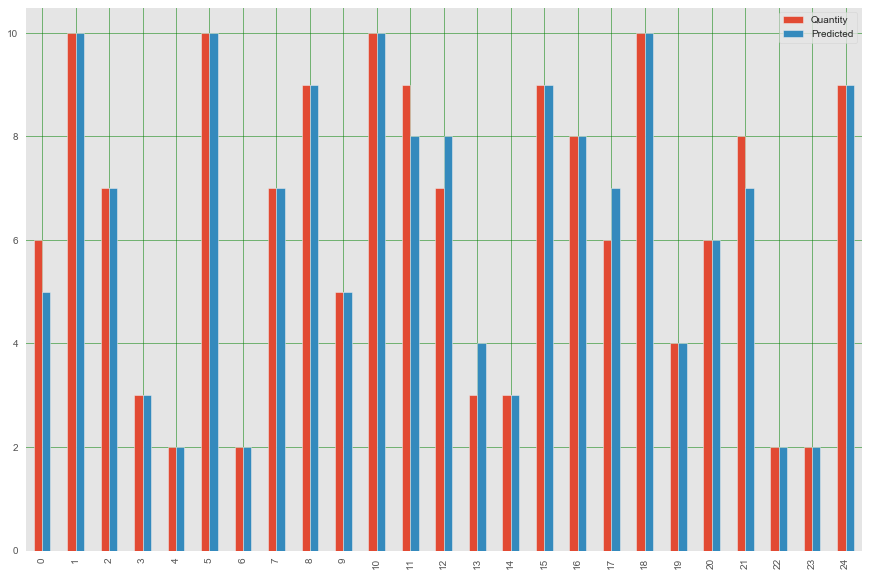

In [119]:
B.plot(kind='bar', figsize = (15, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## SUPPORT VECTOR REGRESSOR

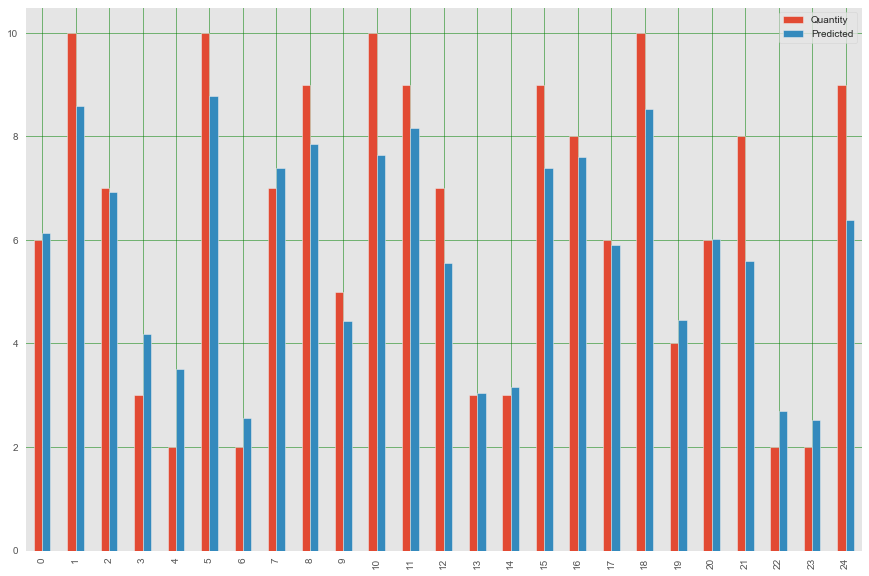

In [120]:
C.plot(kind='bar', figsize = (15, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## RANDOM FOREST REGRESSOR

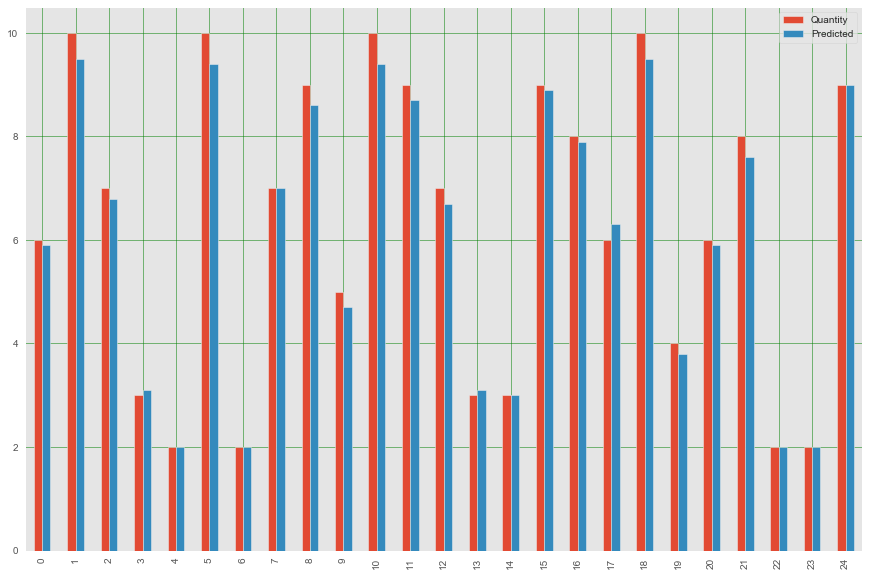

In [121]:
D.plot(kind='bar', figsize = (15, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()